# スクレイピングで株価データを取得する
https://non-dimension.com/kabuka-scraping/

## BeautifulSoupを使った株価データのスクレイピング

In [1]:
#https://non-dimension.com/kabuka-scraping/
from bs4 import BeautifulSoup
import pandas as pd
import requests
from datetime import datetime

## べージのhtmlの取得

In [2]:
#取得したい銘柄の株価データは、https://kabuoji3.com/stock/以下に”/銘柄コード/年/”という形式で存在している
y = 2019
stock_number = 6577 #好きな銘柄コード、今回はベスト・ワンドットコム
url = 'https://kabuoji3.com/stock/{}/{}/'.format(stock_number,y)
# 重要 https://non-dimension.com/solution-403forbidden/
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36 Edg/85.0.564.44"
}
soup = BeautifulSoup(requests.get(url,headers = headers).content,'html.parser')

#print(soup)


# memo
# request関数
# bs4関数

## 株価データをデータフレーム化

In [3]:
tag_tr = soup.find_all('tr')
head = [h.text for h in tag_tr[0].find_all('th')] 
# 項目名を作った

# get data
data = []
for i in range(1,len(tag_tr)):
    data.append([d.text for d in tag_tr[i].find_all('td')])
df = pd.DataFrame(data,columns = head)
df

,日付,始値,高値,安値,終値,出来高,終値調整
0,2019-01-04,4210,4440,4105,4395,3400,2197.5
1,2019-01-07,4420,4780,4420,4780,6200,2390
2,2019-01-08,4920,5480,4920,5480,9800,2740
3,2019-01-09,5480,6440,5320,5700,30100,2850
4,2019-01-10,5600,5800,5550,5550,7000,2775
...,...,...,...,...,...,...,...
236,2019-12-24,4370,5070,4200,5070,82200,5070
237,2019-12-25,4800,5090,4760,5040,59400,5040
238,2019-12-26,5010,5060,4865,5010,24400,5010
239,2019-12-27,4985,5410,4960,5120,30000,5120


## テキストデータを数値、タイムスタンプに変換

In [4]:
col = ['始値','高値','安値','終値','出来高','終値調整']
for c in col:
    df[c] = df[c].astype(float)
df['日付'] = [datetime.strptime(i,'%Y-%m-%d') for i in df['日付']]

# 株価のテクニカル指標をチェックする
https://non-dimension.com/indicator/

In [5]:
date = df['日付']
open = df['始値']
high = df['高値']
low = df['安値']
close = df['終値']
volume = df['出来高']

In [6]:
import talib
sma5 = talib.SMA(close, timeperiod=5)
sma25 = talib.SMA(close,timeperiod=25)
sma75 = talib.SMA(close,timeperiod=75)

rsi9 = talib.RSI(close,timeperiod=9)
rsi14 = talib.RSI(close,timeperiod=14)

**ta-libのインストール**  
https://note.com/tomtom_0301/n/na8fedf6f87ee  
`from pip._internal.utils.compatibility_tags import get_supported`  
`get_supported()`


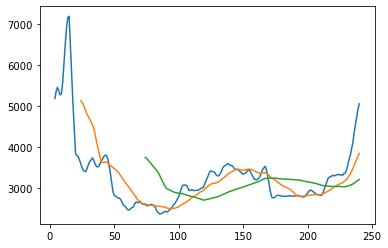

In [7]:
import matplotlib.pyplot as plt
plt.plot(sma5,label='sma5')
plt.plot(sma25,label='sma25')
plt.plot(sma75,label='sma75')

## stochRSI

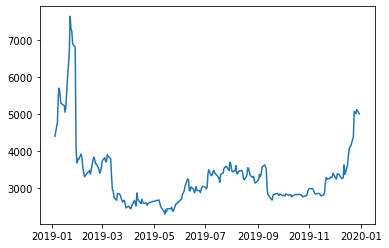

In [8]:
#http://www.algo-fx-blog.com/stochastic-rsi-python/
stochRSI_k, stochRSI_d = talib.STOCHRSI(close,timeperiod=14,fastk_period=5,fastd_period=3,fastd_matype=0)

#レートとストキャスティクスRSIをプロット
#fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
#ax1.plot(date, close)
# ax2.plot(date, stochRSI_k)
# ax2.plot(date, stochRSI_d)
# plt.show()
plt.plot(date, close)

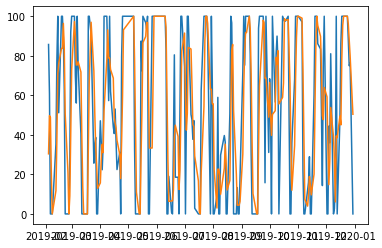

In [9]:
plt.plot(date, stochRSI_k)
plt.plot(date, stochRSI_d)

In [10]:
m5 = sma5.values[-1]
m25 = sma25.values[-1]
m75 = sma75.values[-1]
sk = stochRSI_k.values[-1]
sd = stochRSI_d.values[-1]
ratio = m25/m75


In [11]:
if ratio > 1.02 and sd <20:
    print("buy")
elif ratio < 0.98 or sd >80:
    print("sell")
else:
    print("No signal")

No signal
